In [58]:
import tensorflow as tf    #simialr to numpy arrays , tensorflow use c++ in background
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [59]:
a=tf.constant(2)   #constant
b=tf.constant(3)
a=a+b #a is here addition obj
c=a+b

In [60]:
c   #it willn't evaluate actually

<tf.Tensor 'add_10:0' shape=() dtype=int32>

In [61]:
#for evaluation make a session

In [62]:
sess=tf.Session(config=config)

In [63]:
sess.run(c)

8

In [64]:
c   

<tf.Tensor 'add_10:0' shape=() dtype=int32>

In [65]:
a=tf.constant(2)
b=tf.constant(3)
c=a+b

In [66]:
d=c+3

In [67]:
sess=tf.Session(config=config)    #c is needed to be evaluate for d, so it evaluate c also.
sess.run(d)

8

In [68]:
a1=tf.constant([[1,2]])  #constant can be a list
a2=tf.constant([[1,2],[3,4]])

In [69]:
sess.run(a1)

array([[1, 2]], dtype=int32)

In [70]:
sess.run(a2)

array([[1, 2],
       [3, 4]], dtype=int32)

In [71]:
res=tf.matmul(a1,a2)

In [72]:
sess.run(res)

array([[ 7, 10]], dtype=int32)

In [73]:
#variables

In [74]:
var1=tf.Variable(1221)
var2=tf.Variable(3)

sess.run(tf.global_variables_initializer()) # whenever u make variables , always run this fn. To initialise all var.

addition=var1+var2
sess.run(addition)

1224

In [75]:
# To assign new values to var

assign_var1=var1.assign(121)

In [76]:
sess.run(assign_var1)    #need to put this in sessions

121

In [77]:
sess.run(addition)

124

In [78]:
x=tf.placeholder(tf.int32,shape=(2))   #it req type of input and shape as its arguement
#shape=2 means an array with 2 integere enteries of type int (int32 signify int)
y=x*10
sess=tf.Session(config=config)
sess.run(y,feed_dict={x:[1,2]})   #to evaluate placeholder, we need to give a dictionary as req, containg values of x.

array([10, 20], dtype=int32)

In [79]:
#or

In [80]:
x=tf.placeholder(tf.int32,shape=(2))   #it req type of input and shape as its arguement
#shape=2 means an array with 2 integere enteries of type int (int32 signify int)
y=x*10
sess=tf.Session(config=config)
a=[1,3]
sess.run(y,feed_dict={x:a})     #Use of placeholder: x is a input , whose value is a .

array([10, 30], dtype=int32)

In [81]:
x=tf.placeholder(tf.int32,shape=(2))   #it req type of input and shape as its arguement
#shape=2 means an array with 2 integere enteries of type int (int32 signify int)
x2=tf.placeholder(tf.int32,shape=(2))   
y=x*x2

y2=x*x2
sess=tf.Session(config=config)
a=[1,3]
b=[5,6]
sess.run([y,y2],feed_dict={x:a,x2:a})     

[array([1, 9], dtype=int32), array([1, 9], dtype=int32)]

In [27]:
#shape is not compulsory if u don't know the shape of input,don't give.

In [82]:
x=tf.placeholder(tf.int32)
x2=tf.placeholder(tf.int32)   
y=x*x2
y2=x*x2
sess=tf.Session(config=config)
a=[1,3]
b=[5,6]
sess.run([y,y2],feed_dict={x:a,x2:a})     

[array([1, 9], dtype=int32), array([1, 9], dtype=int32)]

In [83]:
#working on mnist

In [84]:
from tensorflow.examples.tutorials.mnist import input_data

In [85]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [86]:
mnist.train.images.shape

(55000, 784)

In [87]:
import matplotlib.pyplot as plt

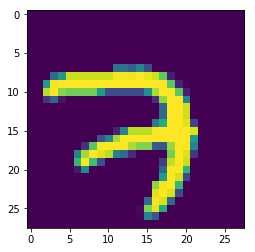

In [88]:
first_image=mnist.train.images[0]     #training data, not training fn
first_image=first_image.reshape((28,28))
plt.imshow(first_image)

In [89]:
mnist.train.labels.shape[0]     #outputs

55000

In [90]:
mnist.train.images    #training data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [92]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
del x

In [94]:
mnist.test.images.shape     #test data shape

(10000, 784)

In [95]:
#need to do forward propagation by own in tensorflow.

In [96]:
n_input=784
n_hidden_1=256   #hidden layer1 , shape of h1=[784,256]
n_hidden_2=256    #hidden layer 2
n_classes=10   #output classes i.e 10 classes

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),    #weights are given random value. shape:784,256
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}
biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),    #biases req are [1,256], so giving shape as [n_hidden_1] etc
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

In [97]:
tf.trainable_variables()   #tells variables it can train here

[<tf.Variable 'Variable:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_2:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_9:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_10:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_12:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_13:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_14:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_15:0' shape=(10,) dtype=float32_ref>]

In [98]:
def forward_propagation(x,weights,biases):
    input_hidden_1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])    #input for hidden layer 1=x*weights +biases
    output_hidden_1=tf.nn.relu(input_hidden_1)              #output of hidden layer 1 is sigmoid, so using relu,
    #relu is an activation fn like sigmoid. relu=max(0,x) so if x is -ve, gives 0, otherwise x
    
    input_hidden_2=tf.add(tf.matmul(output_hidden_1,weights['h2']),biases['h2'])    
    output_hidden_2=tf.nn.relu(input_hidden_2)  
    
    input_output_layer=tf.add(tf.matmul(output_hidden_2,weights['out']),biases['out'])   #input of output layer
    output=input_output_layer
    return output

In [99]:
mnist.train.images[0]    #type of images is float

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [100]:
x=tf.placeholder("float",shape=[None,n_input])       #using placeholder to pre-determine/fix the type of input ,shape
y=tf.placeholder(tf.int32,shape=[None,n_classes])

In [101]:
x,y

(<tf.Tensor 'Placeholder_12:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_13:0' shape=(?, 10) dtype=int32>)

In [102]:

pred=forward_propagation(x,weights,biases)

In [103]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())
c = sess.run(cost, feed_dict={x:mnist.train.images, y:mnist.train.labels})


In [ ]:
c

In [2]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)  #for backPropagation
optimize_step = optimizer.minimize(cost)

NameError: name 'tf' is not defined

In [ ]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())    

In [ ]:
batch_size = 1000  #to apply mini batch gradient
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimize_step], feed_dict={x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

In [2]:


# sess=tf.Session()
# sess.run(tf.global_variables_initializer())    #to initialise all variables
# sess.run(pred,feed_dict={x:mnist.train.images})   #giving dict since placeholder is used.

In [3]:
#actual predictions

In [2]:
predictions = tf.argmax(pred, axis = 1)
actual_labels = tf.argmax(y, axis = 1)

correct_predictions = tf.equal(predictions, actual_labels)

NameError: name 'tf' is not defined

In [ ]:
corect_preds = sess.run(correct_predictions,feed_dict={x:mnist.test.images, y:mnist.test.labels} )

#to work on test data use x:mnist.test.images,y:mnist.test.labels

In [ ]:
correct_preds.sum()   #this is out of 55,000 img to calculate accuracy print(correct_preds.sum()/55000)